Preprocessing the data:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 4].values
#for the categorical variable "state"
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lblx = LabelEncoder()
o = OneHotEncoder(categorical_features = [3])
x[:, 3] = lblx.fit_transform(x[:, 3])
x = o.fit_transform(x).toarray()
x

array([[  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.65349200e+05,   1.36897800e+05,   4.71784100e+05],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.62597700e+05,   1.51377590e+05,   4.43898530e+05],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.53441510e+05,   1.01145550e+05,   4.07934540e+05],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.44372410e+05,   1.18671850e+05,   3.83199620e+05],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.42107340e+05,   9.13917700e+04,   3.66168420e+05],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.31876900e+05,   9.98147100e+04,   3.62861360e+05],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.34615460e+05,   1.47198870e+05,   1.27716820e+05],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.30298130e+05,   1.45530060e+05,   3.23876680e+05],


Dummy variable trap: Note that while building a model, we can put all the dummy vairable in the model fitting, since the last once can be written up as 1-x1-x2-x3... and is reduntant. Below code, allows us to remoce a dummy variable from the fit.


In [4]:
#to remove the dummy variable: Although for the multivariable regression, it is not reqd

x = x[:, 1:]

from sklearn.cross_validation import train_test_split
trainx, testx, trainy, testy = train_test_split(x, y, test_size = 0.2, random_state = 0)

/home/tushar/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(trainx, trainy)
predy = reg.predict(testx)
t = pd.DataFrame(testy, columns = ['actual value'])
r = pd.DataFrame(predy, columns = ['predicted value'])
t = pd.concat([t, r], axis = 1)
t['error'] = 100 *(t['actual value'] - t['predicted value'])/t['actual value']
t

,actual value,predicted value,error
0,103282.38,103015.201598,0.258687
1,144259.40,132582.277608,8.094531
2,146121.95,132447.738452,9.358082
3,77798.83,71976.098513,7.484343
4,191050.39,178537.482211,6.549533
5,105008.31,116161.242302,-10.621000
6,81229.06,67851.692097,16.468697
7,97483.56,98791.733747,-1.341943
8,110352.25,113969.435330,-3.277854
9,166187.94,167921.065696,-1.042871


Is it the most optimum variable? We used all the variable, may be some which are not that significant at all! The goal is to find a optimum team of variables which is powerful enough predictor of the model.

In [13]:
#Backward elimination
import statsmodels.formula.api as sn 
n = np.ones(len(x))
nd = pd.DataFrame(n)

The above library requires a zeroth column index as a series of 1's to satisfy the eqn = b0 + b1*x1 + b2*x2....

In [18]:
#x = np.append(arr = np.ones([len(x), 1]).astype(int), values = x,  axis = 1)
#c = pd.DataFrame(x)
#c.head()
x = pd.concat([pd.DataFrame(np.ones(len(x))), pd.DataFrame(x)], axis = 1)
x.head()

,0,0,1,2,3,4
0,1.0,0.0,1.0,165349.20,136897.80,471784.10
1,1.0,0.0,0.0,162597.70,151377.59,443898.53
2,1.0,1.0,0.0,153441.51,101145.55,407934.54
3,1.0,0.0,1.0,144372.41,118671.85,383199.62
4,1.0,1.0,0.0,142107.34,91391.77,366168.42


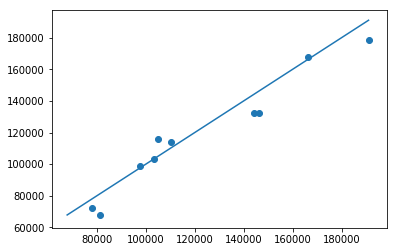

In [163]:
d = np.arange(min(predy), max(testy), 4)
plt.plot(d, d)
plt.scatter(testy, predy)

In [164]:
e = pd.DataFrame(reg.coef_, columns = ['Coefficient'])
f = pd.DataFrame(df.columns, columns = ['Variable'])
i = pd.DataFrame({'Coefficient': [reg.intercept_], 'Variable': ['1']})
coeff_frame = pd.concat([f, e], 1)
coeff_frame = pd.concat([coeff_frame, i], 0)
coeff_frame

,Coefficient,Variable
0,-959.284160,R&D Spend
1,699.369053,Administration
2,0.773467,Marketing Spend
3,0.032885,State
4,0.036610,Profit
0,42554.167618,1


Now as we said, we used all the independent variable. This model can be optimised a lot. Some variable are not significant enough, which can be removed. We will create a team of variables in which each variable has a significant impace on the model by backward elimination. Let's do the preparation: 


In [19]:
import statsmodels.formula.api as sm


Now, in the X matrix, the lib which we are using does not automatically ake into account the constant in the eqn of Linear regression, so we need to add a series of 1 in the X dataframe. We will do that now.

In [4]:
xd = pd.DataFrame(x)
ad = pd.DataFrame({'Constant': np.ones([len(x)]).astype(int)})
d = pd.concat([ad, xd], 1) 
d.head()

,Constant,0,1,2,3,4,5
0,1,0.0,0.0,1.0,165349.20,136897.80,471784.10
1,1,1.0,0.0,0.0,162597.70,151377.59,443898.53
2,1,0.0,1.0,0.0,153441.51,101145.55,407934.54
3,1,0.0,0.0,1.0,144372.41,118671.85,383199.62
4,1,0.0,1.0,0.0,142107.34,91391.77,366168.42


In [172]:
x = d.values
#now our x is ready
#let optx be the matrix with optimum variable
optx = x[:, [0,1,2,3,4,5]]
regstats = sm.OLS(endog = y, exog =optx).fit()
regstats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     272.4
Date:                Sat, 26 May 2018   Prob (F-statistic):           2.76e-29
Time:                        17:27:44   Log-Likelihood:                -527.35
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      46   BIC:                             1070.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.625e+04   1013.373     16.036      0.000    1.42e+04    1.83e+04
x1          1.625e+04   1013.373     16.036      0.000    1.42e+04    1.83e+04
x2          1.625e+04   1013.373     16.036      0.000    1.42e+04    1.83e+04
x3          1163.8663   3379.767      0.344      0.732   -5639.252    7966.985
x4             9.5969   3312.045      0.003      0.998   -6657.204    6676.398
x5             0.8530      0.030     28.226      0.000       0.792       0.914
==============================================================================
Omnibus:                       13.418   Durbin-Watson:                   1.122
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.605
Skew:                          -0.907   Prob(JB):                     0.000150
Kurtosis:                       5.271   Cond. No.                     3.70e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.74e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Now lets remoe the variable with highest P value and refit the model

In [173]:
optx = x[:, [0,1,2,3,5]]
regstats = sm.OLS(endog = y, exog =optx).fit()
regstats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     417.5
Date:                Sat, 26 May 2018   Prob (F-statistic):           1.19e-30
Time:                        17:30:12   Log-Likelihood:                -527.35
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      47   BIC:                             1066.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.625e+04    884.358     18.377      0.000    1.45e+04     1.8e+04
x1          1.625e+04    884.358     18.377      0.000    1.45e+04     1.8e+04
x2          1.625e+04    884.358     18.377      0.000    1.45e+04     1.8e+04
x3          1158.9730   2896.286      0.400      0.691   -4667.604    6985.550
x4             0.8530      0.030     28.691      0.000       0.793       0.913
==============================================================================
Omnibus:                       13.425   Durbin-Watson:                   1.122
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.624
Skew:                          -0.907   Prob(JB):                     0.000149
Kurtosis:                       5.273   Cond. No.                     4.04e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.3e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [174]:
optx = x[:, [0,1,2,5]]
regstats = sm.OLS(endog = y, exog =optx).fit()
regstats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sat, 26 May 2018   Prob (F-statistic):           3.50e-32
Time:                        17:30:27   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.634e+04    845.966     19.320      0.000    1.46e+04     1.8e+04
x1          1.634e+04    845.966     19.320      0.000    1.46e+04     1.8e+04
x2          1.634e+04    845.966     19.320      0.000    1.46e+04     1.8e+04
x3             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     9.76e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.93e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [177]:
xd = pd.DataFrame(testx)
ad = pd.DataFrame({'Constant': np.ones([len(testx)]).astype(int)})
d = pd.concat([ad, xd], 1) 


In [182]:
testx = d.values

array([[  1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          6.60515200e+04,   1.82645560e+05,   1.18148200e+05],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00671960e+05,   9.17906100e+04,   2.49744550e+05],
       [  1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.01913080e+05,   1.10594110e+05,   2.29160950e+05],
       [  1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          2.78929200e+04,   8.47107700e+04,   1.64470710e+05],
       [  1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.53441510e+05,   1.01145550e+05,   4.07934540e+05],
       [  1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          7.21076000e+04,   1.27864550e+05,   3.53183810e+05],
       [  1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          2.02295900e+04,   6.59479300e+04,   1.85265100e+05],
       [  1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          6.11363800e+04,   1.52701920e+05,   8.82182300e+04],
